## EDA & Cleaning: Exploring categorical features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Sex`, `Cabin`, and `Embarked` features.**

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
df = pd.read_csv('course excercise file/Exercise Files/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
df.drop(cont_feat, axis=1, inplace=True)
df.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [5]:

df['Cabin'].count().mean()

204.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [7]:
df.groupby(df['Cabin'].isna()).mean(df['Cabin'].all)

,Survived
Cabin,
False,0.666667
True,0.299854


In [8]:
df['Cabin_ind'] = np.where(df['Cabin'].isnull(),0,1)
df.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


<Figure size 640x480 with 0 Axes>

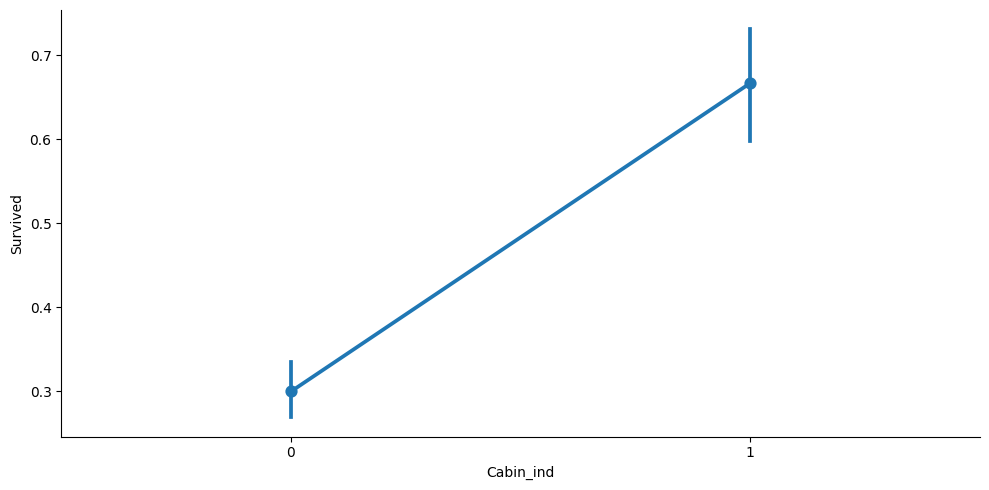

<Figure size 640x480 with 0 Axes>

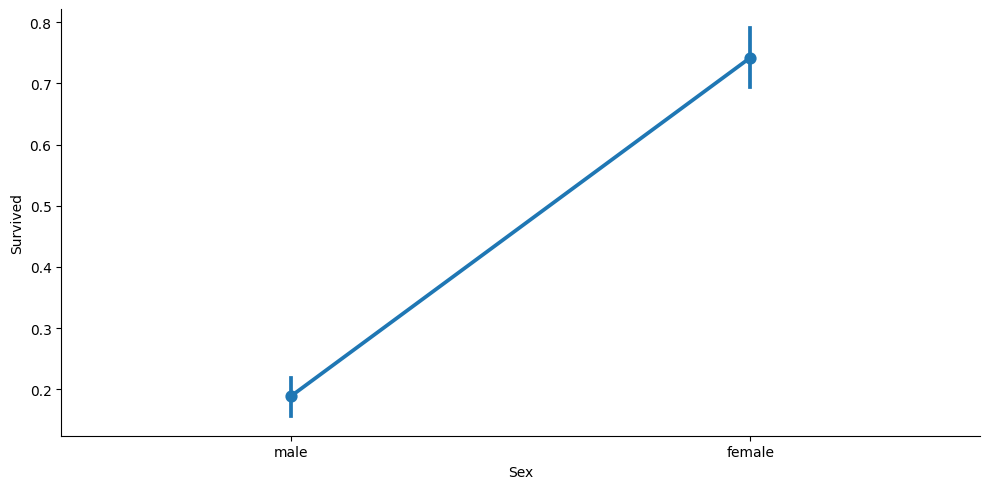

<Figure size 640x480 with 0 Axes>

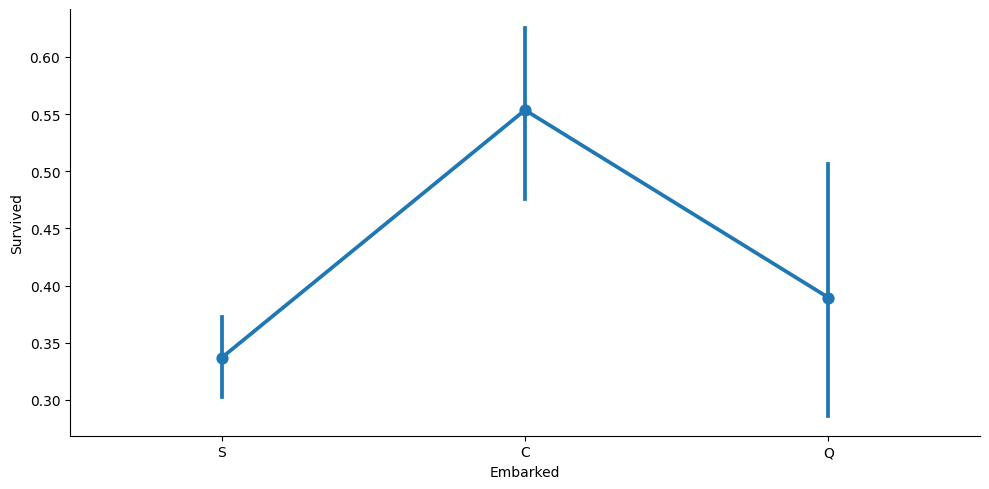

In [9]:
for i, col in enumerate(['Cabin_ind','Sex','Embarked']):
    plt.figure(i)
    sns.catplot(x=col,y=df['Survived'],data=df,kind='point', aspect=2)
    plt.show()

In [21]:
df.pivot_table(df[['Survived']],index=df['Sex'],columns=df['Embarked'],aggfunc='count')

Survived         
Embarked        C   Q    S
Sex                       
female         73  36  203
male           95  41  441

In [17]:
df['Survived'].dtypes

dtype('int64')

In [22]:
df.pivot_table(df[['Survived']],index=df['Cabin_ind'],columns=df['Embarked'],aggfunc='count')

Survived         
Embarked         C   Q    S
Cabin_ind                  
0               99  73  515
1               69   4  129

In [24]:
df.drop(['Ticket'],axis=1,inplace=True)
df.head()

,Survived,Sex,Cabin,Embarked,Cabin_ind
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0


In [25]:
gender = {'male':0,'female':1}
df['Sex'] = df['Sex'].map(gender)

In [26]:
df.head()

,Survived,Sex,Cabin,Embarked,Cabin_ind
0,0,0,NaN,S,0
1,1,1,C85,C,1
2,1,1,NaN,S,0
3,1,1,C123,S,1
4,0,0,NaN,S,0


In [27]:
df.drop(['Cabin','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Sex,Cabin_ind
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0
